In [1]:
#installing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It can see seen that age column have missing values since the total count is 891

In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Here 0 shows who didn't survived and 1 shows who survived

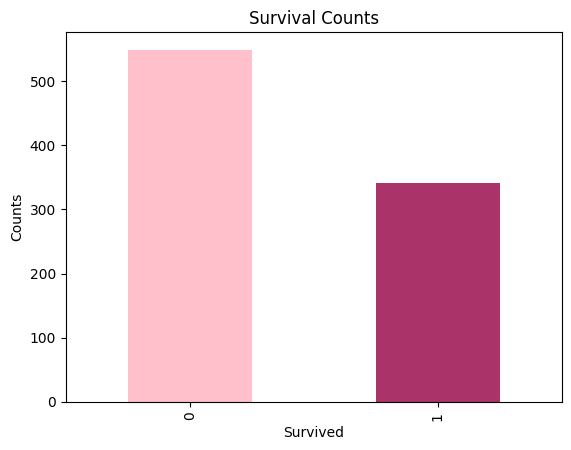

In [6]:
#create bar plot 
data = {'Survived': [0] * 549 + [1] * 342}
df = pd.DataFrame(data)
survived_counts = df['Survived'].value_counts()
survived_counts.plot(kind='bar', color=['#FFC0CB', '#AA336A'])
# Add title and labels
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Counts')
# Show the plot
plt.show()

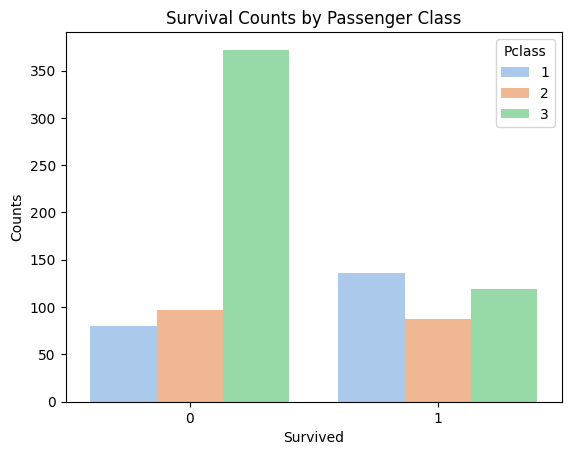

In [7]:
#bar plot of survival wrt pclass
df = pd.read_csv("Titanic-Dataset.csv")
sns.countplot(x='Survived', hue='Pclass', data=df, palette='pastel')
# Add title and labels
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Counts')
# Show the plot
plt.show()

In [8]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

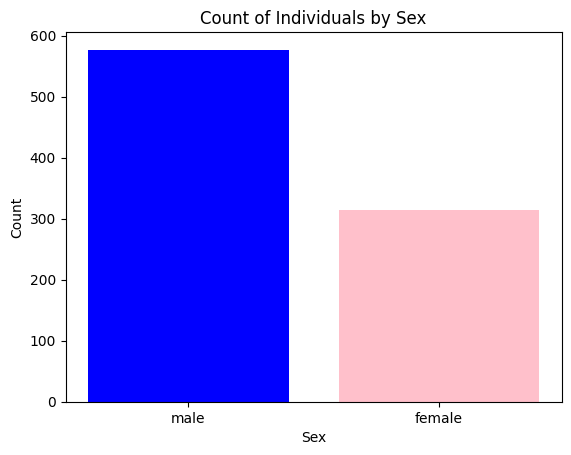

In [9]:
#create bar plot
data = {'Sex': ['male', 'female'], 'count': [577, 314]}
df = pd.DataFrame(data)
plt.bar(df['Sex'], df['count'], color=['blue', 'pink'])
plt.title('Count of Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Sex', ylabel='count'>

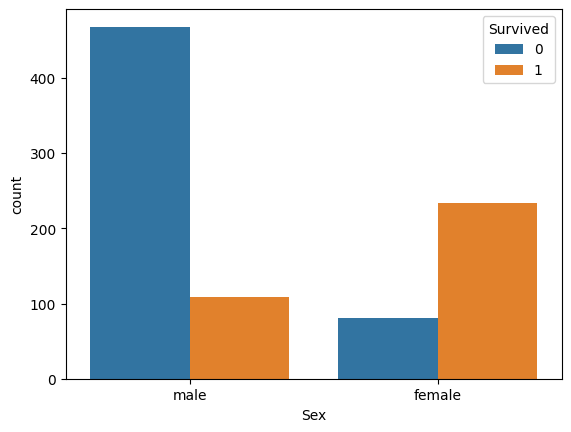

In [10]:
#create bar plot for survival wrt gender
df = pd.read_csv("Titanic-Dataset.csv")
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


male=1; female=0

In [12]:
df=df.drop(['Age'], axis=1)

In [13]:
df_final=df

In [14]:
df_final.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


In [15]:
#training model
X=df[['Pclass','Sex']]
Y=df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [18]:
#for user testing
import warnings
warnings.filterwarnings("ignore")
res=log.predict([[3,1]]) #first parameter stands for Pclass and second for Sex
if(res==0):
    print("Not survived")
else:
    print("Survived") 

Not survived
